In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
indicators_df = pd.read_csv("indicators.csv")
happiness_df = pd.read_csv("happiness.csv")  

In [2]:
# country column for merging
indicators_df.rename(columns={"country": "Country"}, inplace=True)
happiness_df.rename(columns={"Country or region": "Country"}, inplace=True)

In [3]:
# Merge
merged_data = pd.merge(
    indicators_df,
    happiness_df,
    on="Country",
    how="inner"
)

print("Merged Data:")
print(merged_data.head())

Merged Data:
       Country      date  agricultural_land%  forest_land%  land_area  \
0  Afghanistan  1/1/1960                 NaN           NaN        NaN   
1  Afghanistan  1/1/1961           57.878356           NaN   652230.0   
2  Afghanistan  1/1/1962           57.955016           NaN   652230.0   
3  Afghanistan  1/1/1963           58.031676           NaN   652230.0   
4  Afghanistan  1/1/1964           58.116002           NaN   652230.0   

   avg_precipitation  trade_in_services%  control_of_corruption_estimate  \
0                NaN                 NaN                             NaN   
1              327.0                 NaN                             NaN   
2              327.0                 NaN                             NaN   
3              327.0                 NaN                             NaN   
4              327.0                 NaN                             NaN   

   control_of_corruption_std  access_to_electricity%  ...  \
0                        NaN  

In [4]:
# relevant columns for analysis
selected_columns = [
    "Country", "GDP per capita", "Social support", "Healthy life expectancy", "Score",
    "life_expectancy_at_birth", "CO2_emisions", "population", "inflation_annual%"
]
filtered_data = merged_data[selected_columns]

print("Filtered Data for Analysis:")
print(filtered_data.head())

Filtered Data for Analysis:
       Country  GDP per capita  Social support  Healthy life expectancy  \
0  Afghanistan           0.332           0.537                    0.255   
1  Afghanistan           0.332           0.537                    0.255   
2  Afghanistan           0.332           0.537                    0.255   
3  Afghanistan           0.332           0.537                    0.255   
4  Afghanistan           0.332           0.537                    0.255   

   Score  life_expectancy_at_birth  CO2_emisions  population  \
0  3.632                    32.535           NaN   8622466.0   
1  3.632                    33.068           NaN   8790140.0   
2  3.632                    33.547           NaN   8969047.0   
3  3.632                    34.016           NaN   9157465.0   
4  3.632                    34.494           NaN   9355514.0   

   inflation_annual%  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN 

In [5]:
# Reshape
long_data = pd.melt(
    filtered_data,
    id_vars=["Country"],
    value_vars=["GDP per capita", "Social support", "Healthy life expectancy", "Score", "life_expectancy_at_birth"],
    var_name="Indicator",
    value_name="Value"
)

print("Long Format Data:")
print(long_data.head())

Long Format Data:
       Country       Indicator  Value
0  Afghanistan  GDP per capita  0.332
1  Afghanistan  GDP per capita  0.332
2  Afghanistan  GDP per capita  0.332
3  Afghanistan  GDP per capita  0.332
4  Afghanistan  GDP per capita  0.332


In [6]:
# Fix duplicate entries
duplicates = long_data[long_data.duplicated(subset=["Country", "Indicator"], keep=False)]
if not duplicates.empty:
    print("Duplicates found. Aggregating values:")
    print(duplicates)

    # Aggregate duplicates
    long_data = long_data.groupby(["Country", "Indicator"], as_index=False).mean()

# Reshape
wide_data = long_data.pivot(index="Country", columns="Indicator", values="Value")

print("Wide Format Data (Fixed):")
print(wide_data.head())

# Save
wide_data.to_csv("wide_format_dataset_fixed.csv", index=True)

Duplicates found. Aggregating values:
           Country                 Indicator   Value
0      Afghanistan            GDP per capita   0.332
1      Afghanistan            GDP per capita   0.332
2      Afghanistan            GDP per capita   0.332
3      Afghanistan            GDP per capita   0.332
4      Afghanistan            GDP per capita   0.332
...            ...                       ...     ...
43340     Zimbabwe  life_expectancy_at_birth  61.292
43341     Zimbabwe  life_expectancy_at_birth  61.124
43342     Zimbabwe  life_expectancy_at_birth  59.253
43343     Zimbabwe  life_expectancy_at_birth     NaN
43344     Zimbabwe  life_expectancy_at_birth     NaN

[43345 rows x 3 columns]
Wide Format Data (Fixed):
Indicator    GDP per capita  Healthy life expectancy  Score  Social support  \
Country                                                                       
Afghanistan           0.332                    0.255  3.632           0.537   
Albania               0.916          

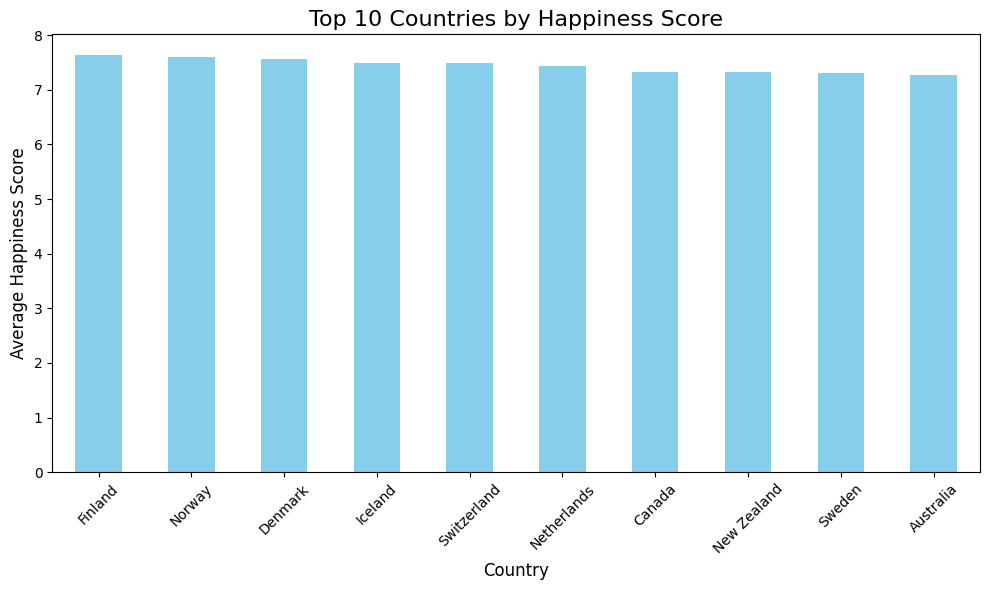

In [7]:
# 1. Bar Chart: Average Happiness Score per Country
avg_happiness = filtered_data.groupby("Country")["Score"].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
avg_happiness.head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Countries by Happiness Score", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Average Happiness Score", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("happiness_score_chart.png")
plt.show()

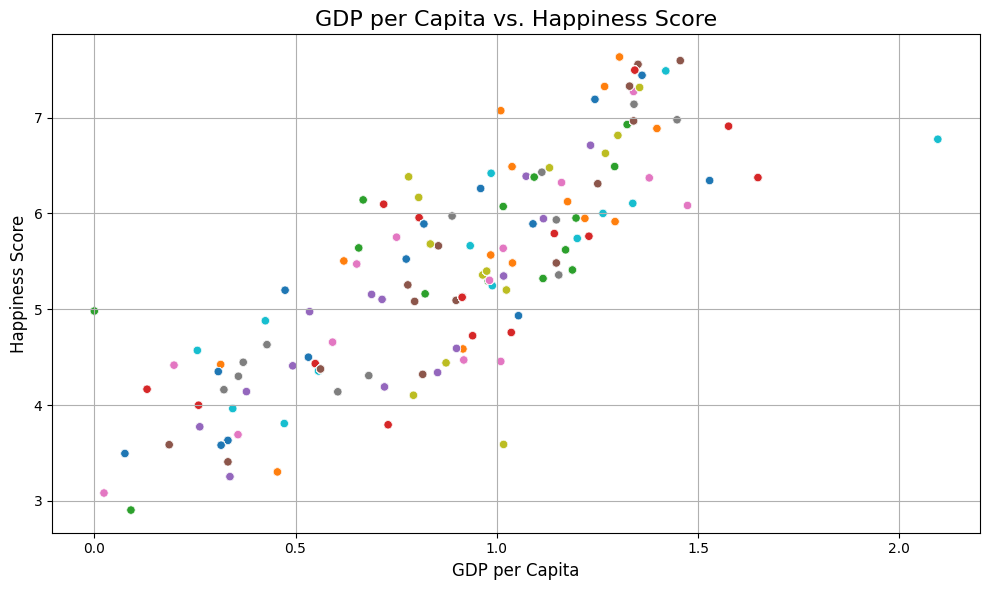

In [8]:
# 2. Scatter Plot: GDP per Capita vs. Happiness Score
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=filtered_data,
    x="GDP per capita",
    y="Score",
    hue="Country",
    palette="tab10",
    legend=False
)
plt.title("GDP per Capita vs. Happiness Score", fontsize=16)
plt.xlabel("GDP per Capita", fontsize=12)
plt.ylabel("Happiness Score", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig("gdp_vs_happiness_scatter.png") 
plt.show()

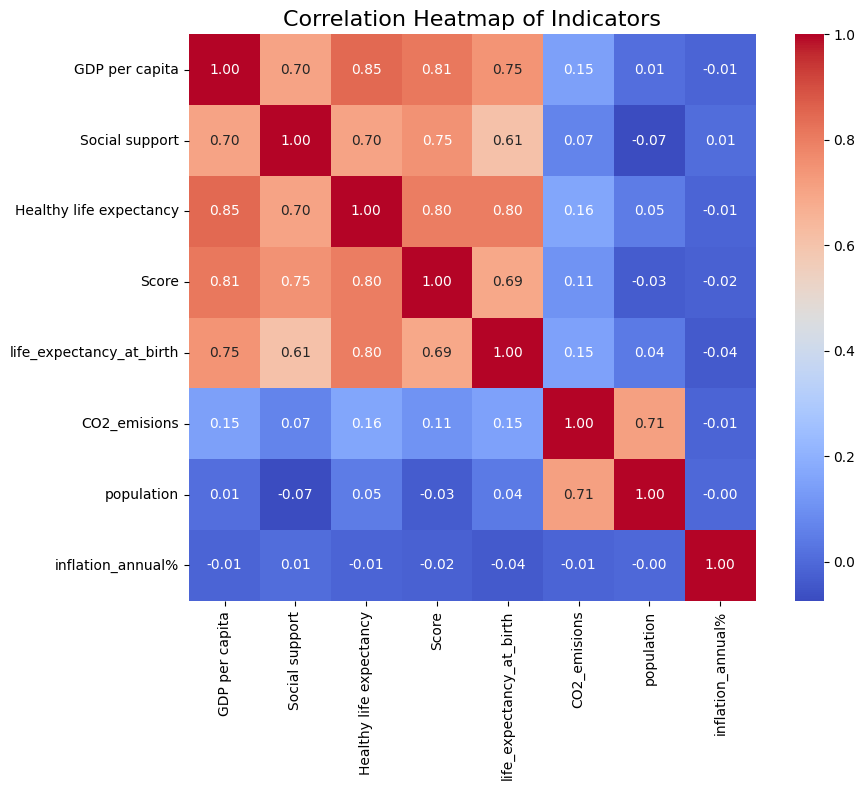

In [9]:
# 3. Heatmap: Correlation of Indicators
correlation_data = filtered_data.drop(columns=["Country"]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_data,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    square=True
)
plt.title("Correlation Heatmap of Indicators", fontsize=16)
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()